In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
data = pd.read_csv("/content/drive/MyDrive/data.csv") 
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [127]:
data.shape

(174389, 19)

In [128]:
data.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

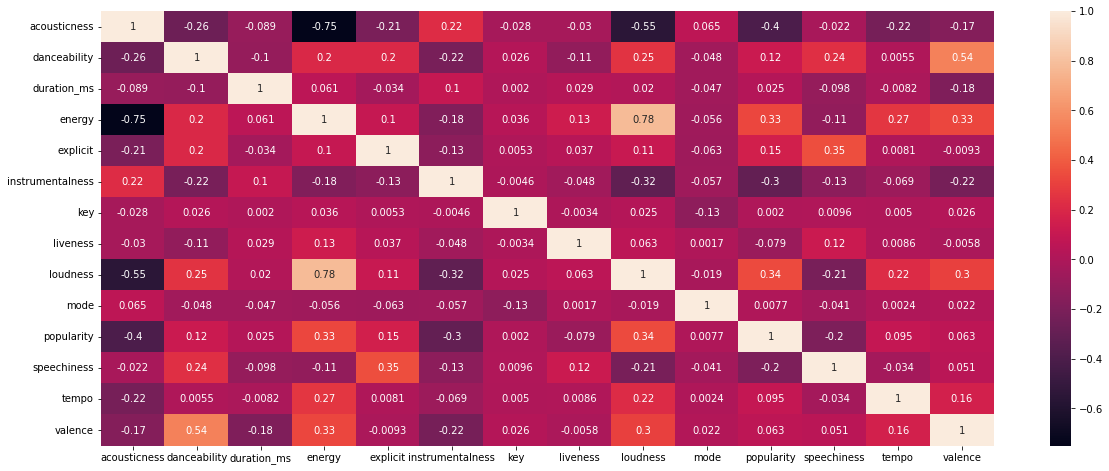

In [129]:
viz_data=data.drop(columns=['id','name','artists','release_date','year'])
plt.subplots(figsize=(20,8))
sns.heatmap(viz_data.corr(),annot=True)

In [130]:
def normalize_column(col):
    max_d = data[col].max()
    min_d = data[col].min()
    data[col] = (data[col] - min_d)/(max_d - min_d)

In [131]:
num_types = ['int16','int32','int64', 'float16', 'float32', 'float64']
num = data.select_dtypes(include=num_types)     
for col in num.columns:
    normalize_column(col)

In [132]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
cat = km.fit_predict(num)
data['cat'] = cat
normalize_column('cat')

In [133]:
data.cat[:12]

0     0.000000
1     0.000000
2     0.000000
3     0.222222
4     0.000000
5     0.777778
6     0.000000
7     0.000000
8     0.000000
9     0.555556
10    0.000000
11    0.000000
Name: cat, dtype: float64

In [134]:
pucho=data[data.name=='Venom']
pucho.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cat
93068,0.033333,['Ghostemane'],0.920040,0.024250,0.573,1.0,7tUXZgLbOCvRJ9FBlairoU,0.0163,0.454545,0.657,0.832261,1.0,Venom,0.67,2016-07-03,0.186406,0.595244,0.392,0.950495,1.0
157941,0.217871,"['$uicideBoy$', 'Shakewell']",0.807692,0.022193,0.624,1.0,4jCeguq9rMTlbMmPHuO7S3,0.0000,0.181818,0.166,0.819544,1.0,Venom,0.62,2017-05-25,0.301751,0.607736,0.591,0.960396,1.0


In [135]:
class AakarshanRecommender():
    def __init__(self, rec_data):
        self.rec_data_ = rec_data

    def get_recommendations(self, song_name, amount=1):
        distances = []
        song = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())].head(1).values[0]
        from tqdm import tqdm
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
              
                if not col in [1, 6, 12, 14, 18]:
                    
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        
        res_data = res_data.sort_values('distance')
        columns = ['artists', 'name']
        return res_data[columns][:amount]

In [136]:
recommender=AakarshanRecommender(data)
recommender.get_recommendations('Venom', 8)

100%|██████████| 174387/174387 [00:12<00:00, 13587.35it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,artists,name
141419,['Die Antwoord'],I Fink U Freeky
19112,['Kanye West'],Father Stretch My Hands Pt. 1
126591,['CORPSE'],Cabin Fever
38928,['Kevin Gates'],Me Too
142969,['Playboi Carti'],Not PLaying
38874,['Juice WRLD'],Hurt Me
124119,"['Gym Class Heroes', 'The-Dream']",Cookie Jar (feat. The-Dream)
38992,"['Migos', 'Nicki Minaj', 'Cardi B']",MotorSport
